In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Gerekli Kütüphanelerin Eklenmesi**

In [106]:
import numpy as nnp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# **3. Keşifsel Veri Analizi Yapılması**

In [107]:
# csv dosyasını pandas datarame olarak kaydetme
df = pd.read_csv("/content/drive/MyDrive/Medical_Cost_Personal/insurance.csv")

In [108]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [109]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [110]:
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

In [111]:
pd.get_dummies(df.region, prefix='region')

,region_0,region_1,region_2,region_3
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [112]:
df.sex=pd.get_dummies(df.sex,drop_first=True)
df.smoker=pd.get_dummies(df.smoker,drop_first=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### **3.1 Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz**

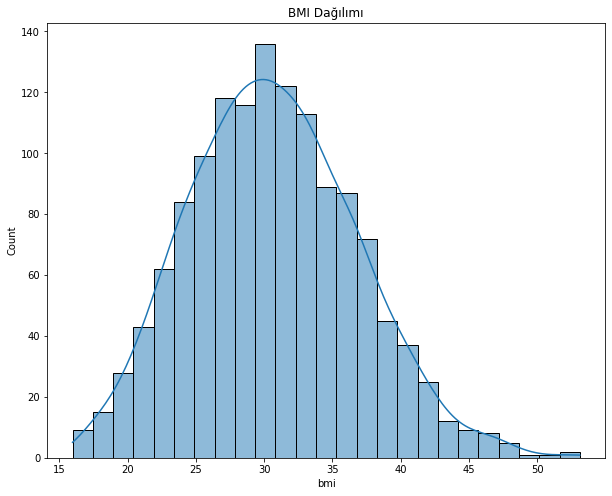

In [113]:
#BMI değerleri incelenerek dağılımı görselleştirildi.
plt.figure(figsize = (10,8))
sns.histplot(x = 'bmi', data = df, kde = True)
plt.title('BMI Dağılımı')
plt.show()

### **3.2 "smoker" ile "charges" arasındaki ilişkiyi inceleyiniz**

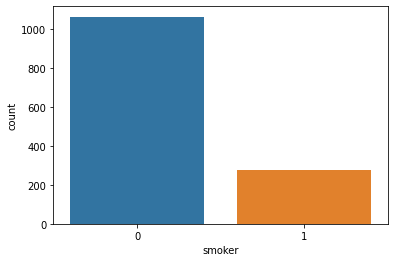

In [114]:
sns.countplot(x='smoker',data=df)

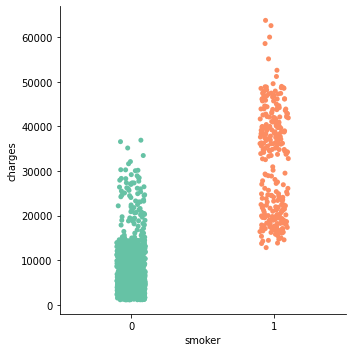

In [115]:
sns.catplot(x = "smoker", y = "charges", palette = "Set2", data = df)

In [116]:
smoker_charges_corr = df[['smoker','charges']].corr()

In [117]:
smoker_charges_corr

,smoker,charges
smoker,1.000000,0.787251
charges,0.787251,1.000000


Text(0.5, 1.0, 'Smoker ve Charges arasındaki ilişki')

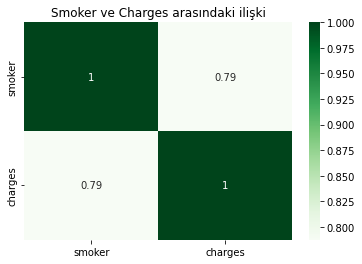

In [118]:
sns.heatmap(smoker_charges_corr,annot=True,cmap='Greens')
plt.title('Smoker ve Charges arasındaki ilişki')

“smoker” ile “charges” arasındaki ilişki corelasyon matrisi ile incelendi.
2 değişken arasında korelasyon yüksektir.

### **3.3 "smoker" (Sigara tüketen) ile "region"(Bölge) arasındaki ilişkiyi inceleyiniz.**

In [119]:
smoker_region_corr = df[['smoker','region']].corr()
smoker_region_corr

,smoker,region
smoker,1.000000,-0.002181
region,-0.002181,1.000000


Text(0.5, 1.0, 'Smoker ve Region arasındaki ilişki')

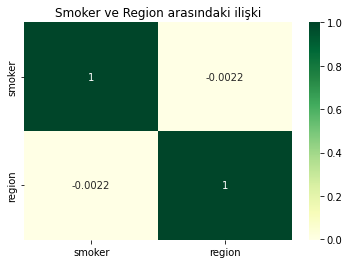

In [124]:
sns.heatmap(smoker_region_corr,annot=True,cmap='YlGn')
plt.title('Smoker ve Region arasındaki ilişki')

### **3.4 “bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.**

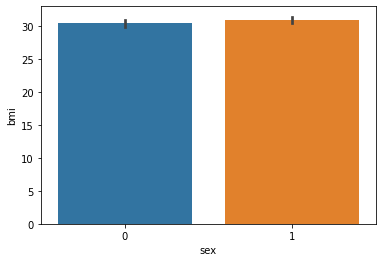

In [91]:
sns.barplot(x = 'sex',
            y = 'bmi',
            data = df)
plt.show()

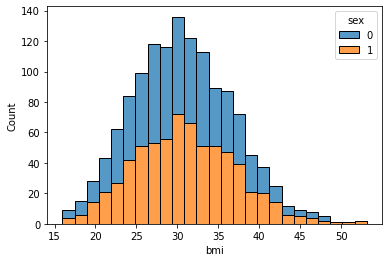

In [93]:
sns.histplot(data=df, x="bmi", hue="sex", multiple="stack")
plt.show()

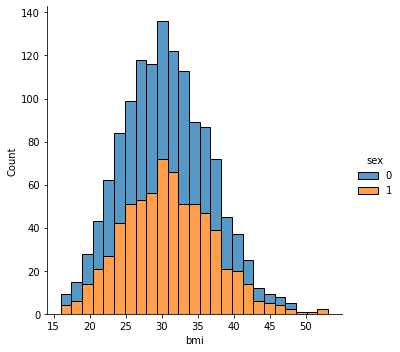

In [94]:
sns.displot(data=df, x="bmi", hue="sex", multiple="stack")
plt.show()

İki cinsiyet de normal dağılımda, kadınların BMI'ı erkeklerden daha yüksek

### **3.5 En çok “children”’a sahip “region”’ı bulunuz.**

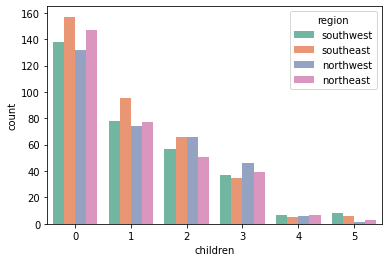

In [95]:
sns.countplot(x ='children', hue = "region", data = df, palette="Set2")
plt.show()

In [97]:
kid_count = df.groupby("region")["children"].sum().sort_values(ascending=False)
kid_count

region
southeast    382
northwest    373
southwest    371
northeast    339
Name: children, dtype: int64

En çok çocuğu olan bölge Southeast

In [98]:
type(kid_count)

pandas.core.series.Series

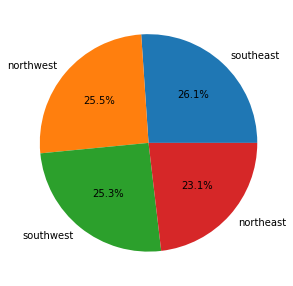

In [99]:
labels=kid_count.index
sizes=kid_count.values
plt.figure(figsize=(12,5))
#colors=sns.color_palette('pastel')
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.show()

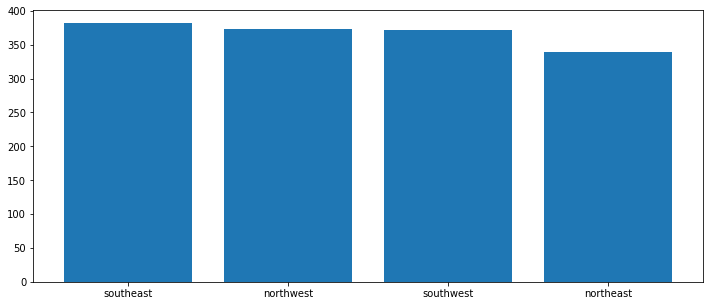

In [100]:
labels=kid_count.index
sizes=kid_count.values
plt.figure(figsize=(12,5))
plt.bar(labels,sizes)
plt.show()

### **3.6 “Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.**

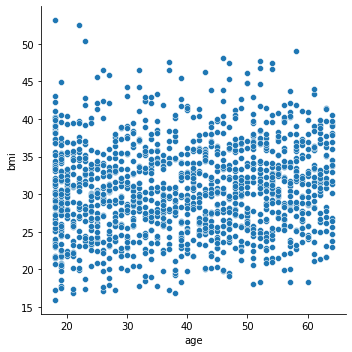

In [71]:
sns.relplot(x='age', y = 'bmi' , data = df)

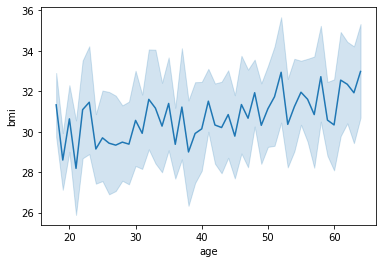

In [72]:
sns.lineplot(x="age", y="bmi",data=df) 

In [73]:
age_bmi_corr = df[['age','bmi']].corr()
age_bmi_corr 

,age,bmi
age,1.000000,0.109272
bmi,0.109272,1.000000


Text(0.5, 1.0, 'Age ile bmi arasındaki ilişki')

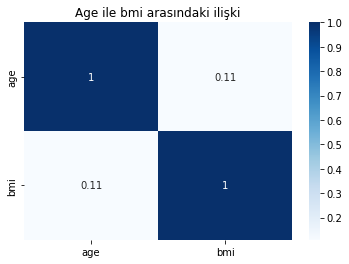

In [74]:
sns.heatmap(age_bmi_corr,annot=True,cmap='Blues')
plt.title('Age ile bmi arasındaki ilişki')

### **3.7 “bmi” ile “children” arasındaki ilişkiyi inceleyiniz.**

In [75]:
df.groupby(["children"])["bmi"].describe()

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,574.0,30.550296,6.039106,15.960,26.14375,30.3025,34.74625,53.13
1,324.0,30.623148,6.101435,16.815,26.61500,30.0150,34.23750,52.58
2,240.0,30.978104,6.509644,16.815,25.78625,31.6400,35.35750,48.07
3,157.0,30.684331,5.787173,18.905,27.26500,30.4950,34.32000,46.53
4,25.0,31.391200,4.627211,24.415,28.21500,29.6400,33.66000,41.47
5,18.0,29.605000,7.139686,18.300,24.30250,28.5500,33.05500,46.75


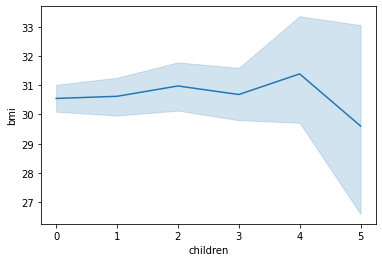

In [76]:
sns.lineplot(x = "children", y = "bmi", data=df)

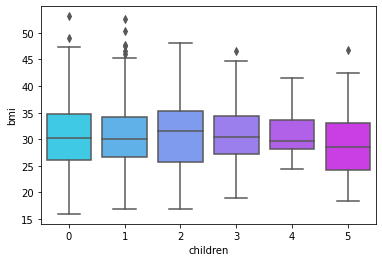

In [77]:
sns.boxplot(x=df['children'], y=df['bmi'], palette="cool")

### -> Grafiği incelendiğinde outlier değerler olduğu tespit edilmiştir.

In [78]:
children_bmi_corr = df[['children','bmi']].corr()
children_bmi_corr 

,children,bmi
children,1.000000,0.012759
bmi,0.012759,1.000000


Text(0.5, 1.0, 'Bmi ile children arasındaki ilişki')

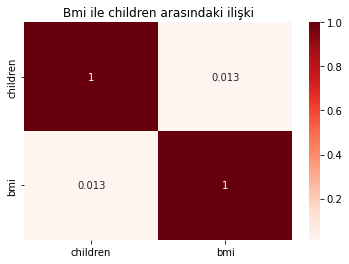

In [79]:
sns.heatmap(children_bmi_corr,annot=True,cmap='Reds')
plt.title('Bmi ile children arasındaki ilişki')

### **3.8 bmi” değişkeninde outlier var mıdır? İnceleyiniz**

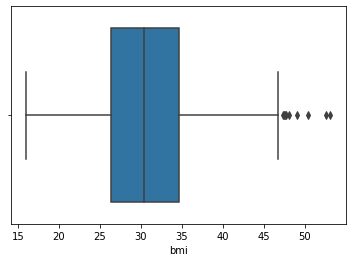

In [80]:
sns.boxplot(data=df, x="bmi")

In [81]:
df_bmi = df['bmi']
Q1 = df_bmi.quantile(0.25)
print(f"Q1: {Q1}")
Q3 = df_bmi.quantile(0.75)
print(f"Q3: {Q1}")
IQR = Q3 - Q1
print(f"IQR: {Q1}")
lower_threshold = Q1 - 1.5*IQR
print(f"lower_threshold: {lower_threshold}")
upper_threshold = Q3 + 1.5*IQR
print(f"upper_threshold: {upper_threshold}")

Q1: 26.29625
Q3: 26.29625
IQR: 26.29625
lower_threshold: 13.7
upper_threshold: 47.290000000000006


In [82]:
#BMI özelliğinin sadece üst kısmında 9 aykırı değer vardır.
upper_outliers_count = df.query(f'bmi > {upper_threshold}')["bmi"].count()
print(f"Upper_outliers_count: {upper_outliers_count}")
lower_outliers_count = df.query(f'bmi < {lower_threshold}')["bmi"].count()
print(f"Lower_outliers_count: {lower_outliers_count}")

Upper_outliers_count: 9
Lower_outliers_count: 0


In [83]:
#Aykırı değerler modeli bozar o yüzden çıkarılması gerekmektedir.

df_bmi = df['bmi']
upper_outliers = df[df_bmi > upper_threshold]
upper_outliers["bmi"] = upper_threshold
upper_outliers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,age,sex,bmi,children,smoker,region,charges
116,58,1,47.29,0,0,southeast,11381.32540
286,46,0,47.29,2,0,northeast,9432.92530
401,47,1,47.29,1,0,southeast,8083.91980
543,54,0,47.29,0,1,southeast,63770.42801
847,23,1,47.29,1,0,southeast,2438.05520
860,37,0,47.29,2,1,southwest,46113.51100
1047,22,1,47.29,1,1,southeast,44501.39820
1088,52,1,47.29,1,0,southeast,9748.91060
1317,18,1,47.29,0,0,southeast,1163.46270


In [84]:
non_outliers = df[~(df["bmi"] > upper_threshold)]
new_df = pd.concat([non_outliers, upper_outliers])
new_df.reset_index(inplace=True)
new_df.drop(columns = ['index'], inplace=True)

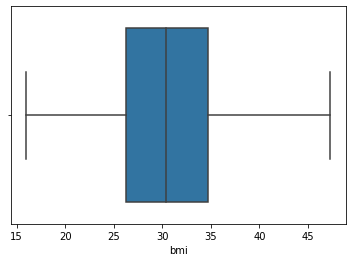

In [85]:
#Aykırı değerleir çıkardıktan sonra görsel
sns.boxplot(data=new_df, x="bmi")

### **3.9“bmi” ile “charges” arasındaki ilişkiyi inceleyiniz**

In [87]:
#Kolerasyon
correlation=df.corr()
correlation

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


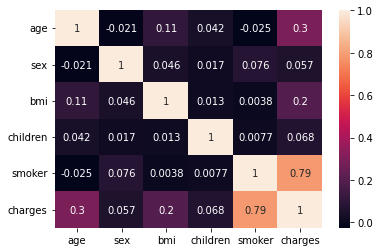

In [88]:
#Kolerasyon matrisi incelendiğinde  “bmi” ile “charges” arasında zayıf (0.2) bir ilişki vardır.

Corr_Heatmap=sns.heatmap(correlation,annot=True)

### **3.10 “region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.**

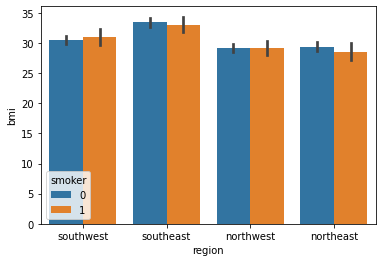

In [89]:
sns.barplot(data=new_df, x="region", y="bmi", hue="smoker")

Text(0.5, 1.0, 'Missing values heatmap')

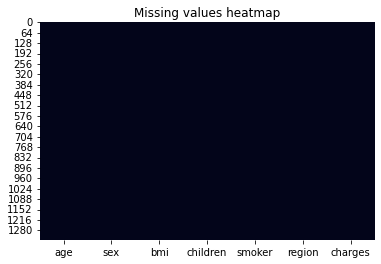

In [125]:
df.isnull().sum()
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

# **4. Veri Ön İşleme Yapılması**

Bu kısımda elinizde olan veriyi model eğitmek için hazır hale getirildi.

● Kategorik değişkenleri düzenlemek için Label ve One-Hot Encoding tekniklerini yukarıda kullanıldı

In [127]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [ ]:
encoder_df = pd.DataFrame(encoder.fit_transform(df[['region']]).toarray())

In [ ]:
df = df.join(encoder_df)


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,0,1,2,3
0,19,0,27.900,0,1,3,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,2,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,2,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,1,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,1,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,2,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,3,2007.94500,0.0,0.0,0.0,1.0
